# 1- Boston house price prediction

## 1-1 Import libraries

In [15]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

## 1-2 Load dataset

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(404, 13) (404,) (102, 13) (102,)


## 1-3 Standard scaling

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

## 1-4 DNN model design

In [5]:
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
import keras

model = models.Sequential()
model.add(layers.Input(shape=(13,)))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.1))

model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 128)               0

2024-03-08 15:48:19.330756: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-03-08 15:48:19.330778: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-03-08 15:48:19.330787: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-03-08 15:48:19.330815: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-08 15:48:19.330830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


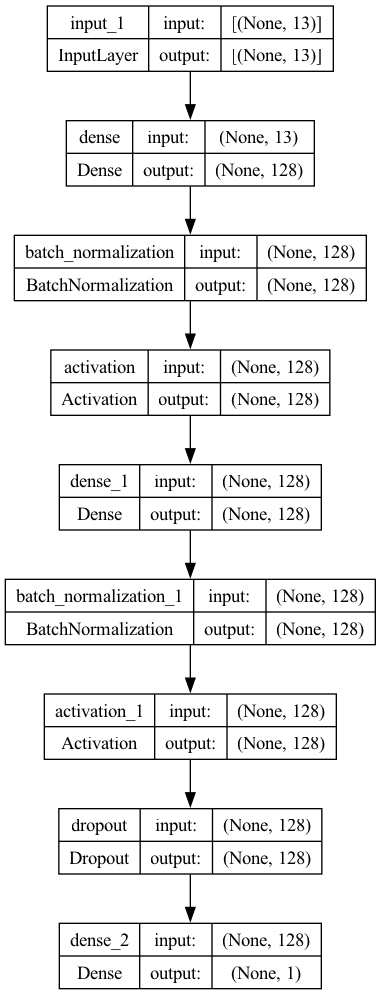

In [6]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

## 1-5 Complie model and training

In [7]:
model.compile(loss='mse',
              optimizer='SGD',
              metrics=['mae'])

check_point_cb = callbacks.ModelCheckpoint('boston_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(train_data, train_labels, 
                     epochs=60,
                     validation_data=(test_data, test_labels),
                     callbacks=[check_point_cb, early_stopping_cb])


Epoch 1/60


2024-03-08 15:48:19.945401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 54ms/step - loss: 120.9452 - mae: 7.6511 - val_loss: 120.5043 - val_mae: 9.8963
Epoch 2/60
 7/13 [===============>..............] - ETA: 0s - loss: 27.2716 - mae: 3.6261

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 26ms/step - loss: 35.2864 - mae: 4.1599 - val_loss: 112.5817 - val_mae: 9.4072
Epoch 3/60
13/13 [==============================] - 0s 25ms/step - loss: 25.8778 - mae: 3.5856 - val_loss: 96.5325 - val_mae: 8.7259
Epoch 4/60
13/13 [==============================] - 0s 26ms/step - loss: 23.2074 - mae: 3.4939 - val_loss: 61.5904 - val_mae: 6.2461
Epoch 5/60
13/13 [==============================] - 0s 26ms/step - loss: 21.1641 - mae: 3.4130 - val_loss: 58.2379 - val_mae: 6.6447
Epoch 6/60
13/13 [==============================] - 0s 24ms/step - loss: 22.4717 - mae: 3.3938 - val_loss: 80.9747 - val_mae: 8.0775
Epoch 7/60
13/13 [==============================] - 0s 25ms/step - loss: 23.2334 - mae: 3.4228 - val_loss: 49.2311 - val_mae: 5.9075
Epoch 8/60
13/13 [==============================] - 0s 25ms/step - loss: 16.8186 - mae: 2.9246 - val_loss: 48.5501 - val_mae: 5.7210
Epoch 9/60
13/13 [==============================] - 0s 26ms/step - loss: 33.472

In [8]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [9]:
def show_history_r(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_mae')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_mae')
    ax2.set_title('Train and Validation MAE')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('MAE')
    ax2.grid()
    ax2.legend()

    plt.show()

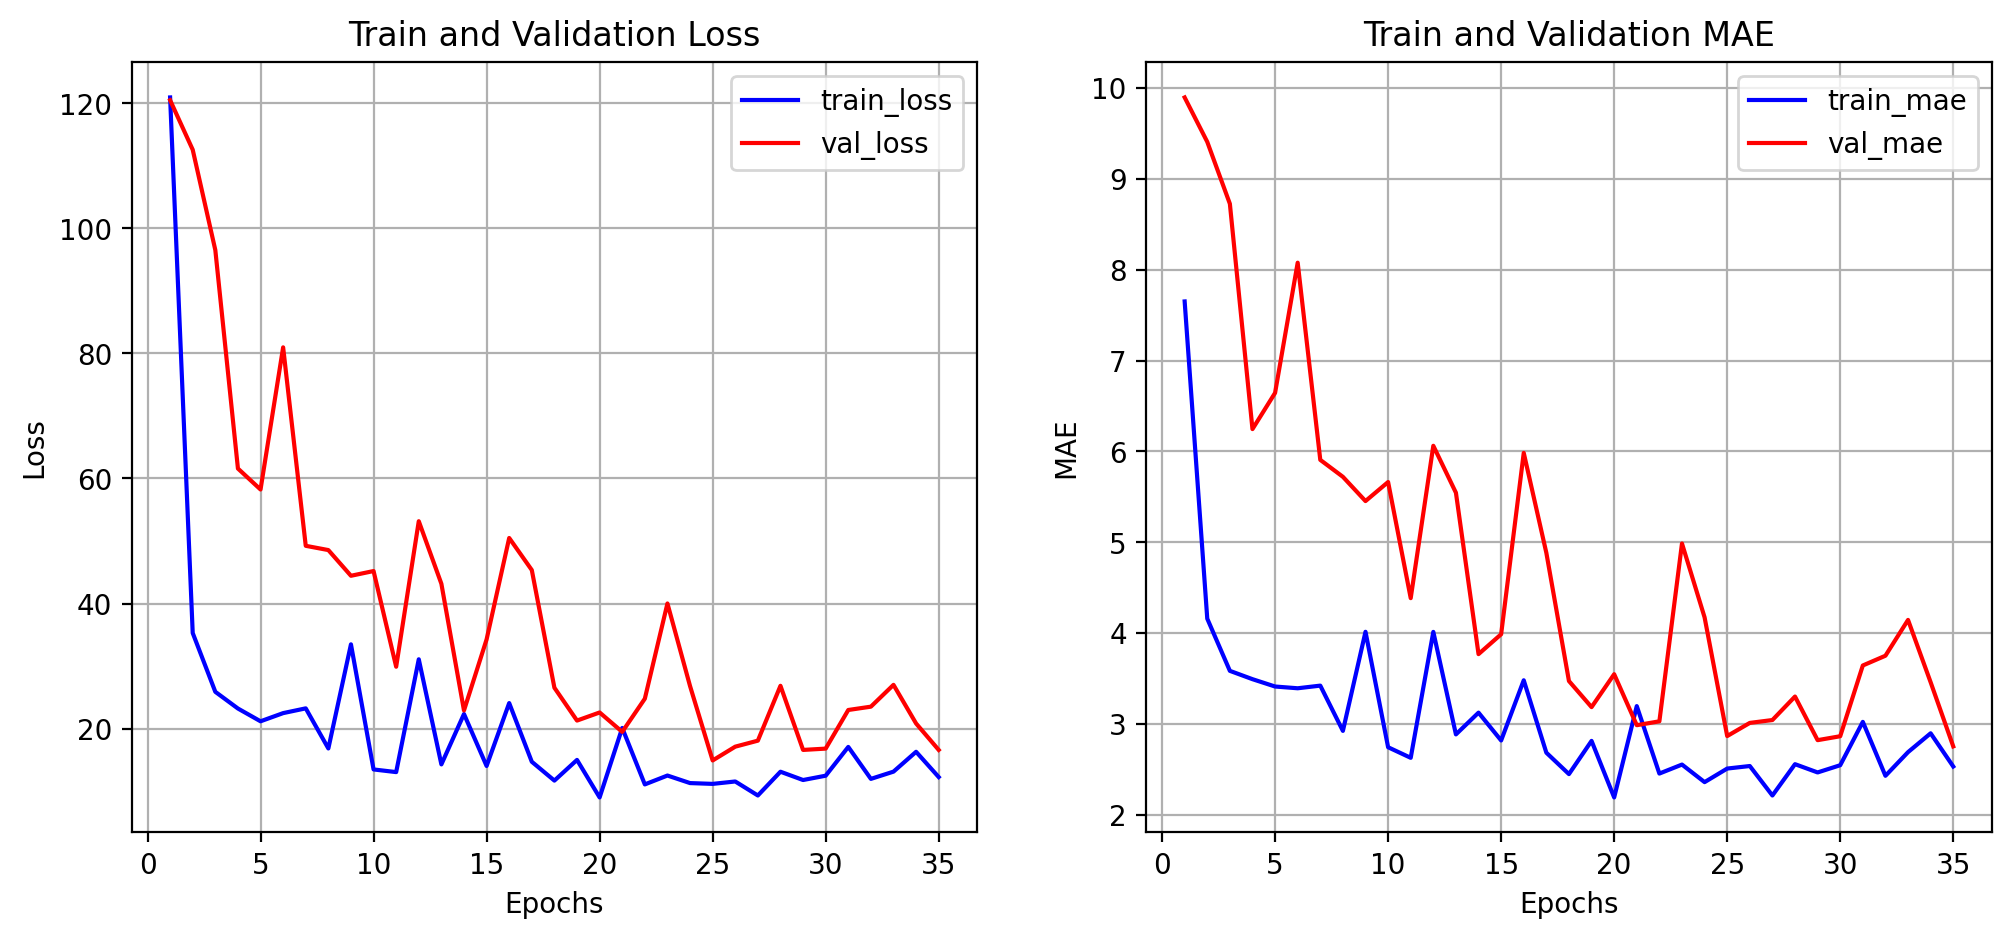

In [10]:
show_history_r(history)

## 1-6 Evaluation

In [12]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 14ms/step - loss: 14.8998 - mae: 2.8678


[14.899758338928223, 2.867838144302368]

4/4 [==============================] - 0s 4ms/step


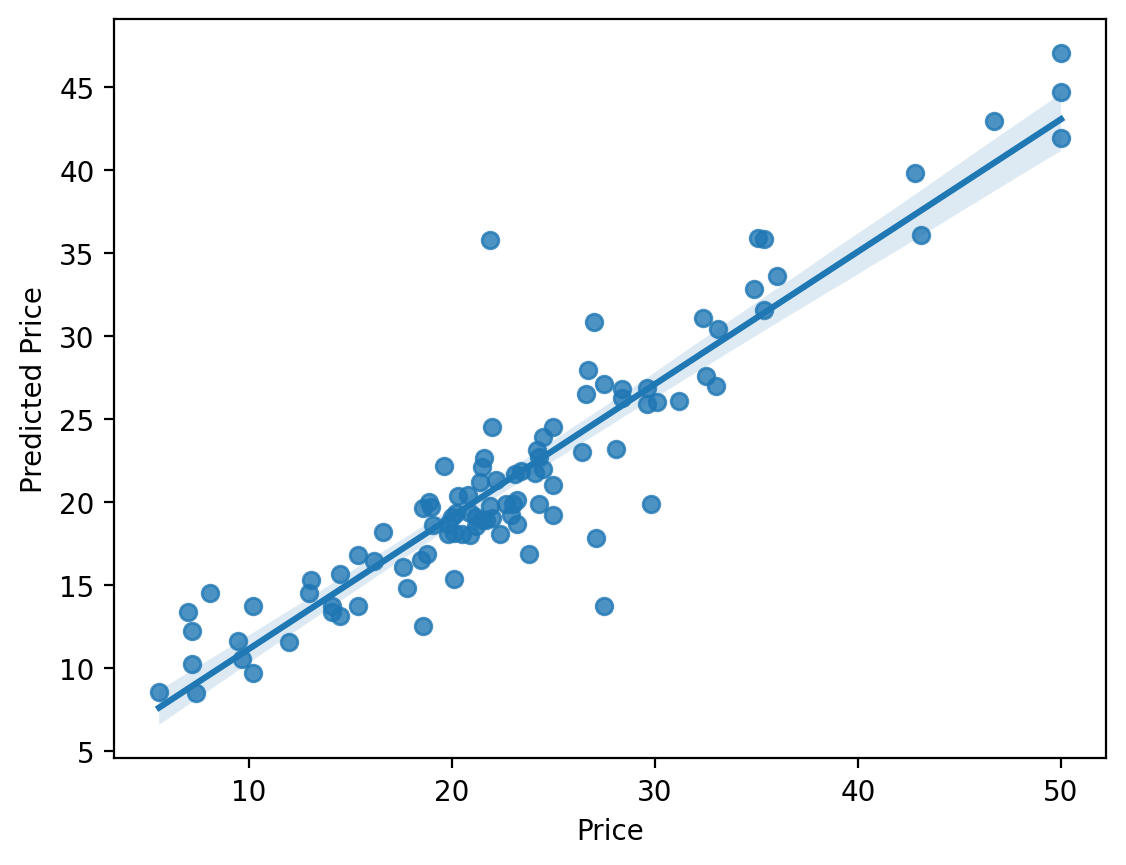

In [20]:
pred_y = model.predict(test_data)
sns.regplot(x = test_labels, y = pred_y)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()  

In [22]:
from sklearn.metrics import r2_score
r2_score(test_labels, pred_y)

0.8236710128711044

# 2- Reuters

## 2-1 Importing libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

## 2-2 Load dataset

In [31]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.26)

print(train_data.shape, train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape)
print(len(train_data))
print(len(test_data))
print(len(val_data))
print(len(set(train_labels)))

(6646,) (6646,) (2336,) (2336,) (2246,) (2246,)
6646
2246
2336
46


## 2-3 Onehot encoding and transform labels to categories

In [32]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [33]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(6646, 10000) (6646, 46) (2336, 10000) (2336, 46) (2246, 10000) (2246, 46)


## 2-4 DNN model design

In [62]:
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))

model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

model.add(layers.Dropout(0.2))


model.add(layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

model.add(layers.Dropout(0.2))

model.add(layers.Dense(46, activation='softmax', name='output'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               1280128   
                                                                 
 batch_normalization_12 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 activation_12 (Activation)  (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_13 (Ba  (None, 128)               512       
 tchNormalization)                                    

## 2-5 Complie and training

In [63]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
13/13 [==============================] - 2s 105ms/step - loss: 4.8515 - accuracy: 0.5641 - val_loss: 5.5063 - val_accuracy: 0.7247
Epoch 2/60
 3/13 [=====>........................] - ETA: 0s - loss: 3.1278 - accuracy: 0.8060

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 1s 49ms/step - loss: 2.8780 - accuracy: 0.8002 - val_loss: 4.8691 - val_accuracy: 0.7252
Epoch 3/60
13/13 [==============================] - 1s 49ms/step - loss: 2.1427 - accuracy: 0.8656 - val_loss: 4.3786 - val_accuracy: 0.6580
Epoch 4/60
13/13 [==============================] - 1s 47ms/step - loss: 1.6617 - accuracy: 0.9019 - val_loss: 3.9758 - val_accuracy: 0.5098
Epoch 5/60
13/13 [==============================] - 1s 50ms/step - loss: 1.3432 - accuracy: 0.9230 - val_loss: 3.6391 - val_accuracy: 0.4396
Epoch 6/60
13/13 [==============================] - 1s 47ms/step - loss: 1.1132 - accuracy: 0.9358 - val_loss: 3.3316 - val_accuracy: 0.3694
Epoch 7/60
13/13 [==============================] - 1s 50ms/step - loss: 0.9616 - accuracy: 0.9442 - val_loss: 3.0987 - val_accuracy: 0.3716
Epoch 8/60
13/13 [==============================] - 1s 46ms/step - loss: 0.8365 - accuracy: 0.9485 - val_loss: 2.8696 - val_accuracy: 0.3870
Epoch 9/60
13/13 [======

In [65]:
def show_history_c(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

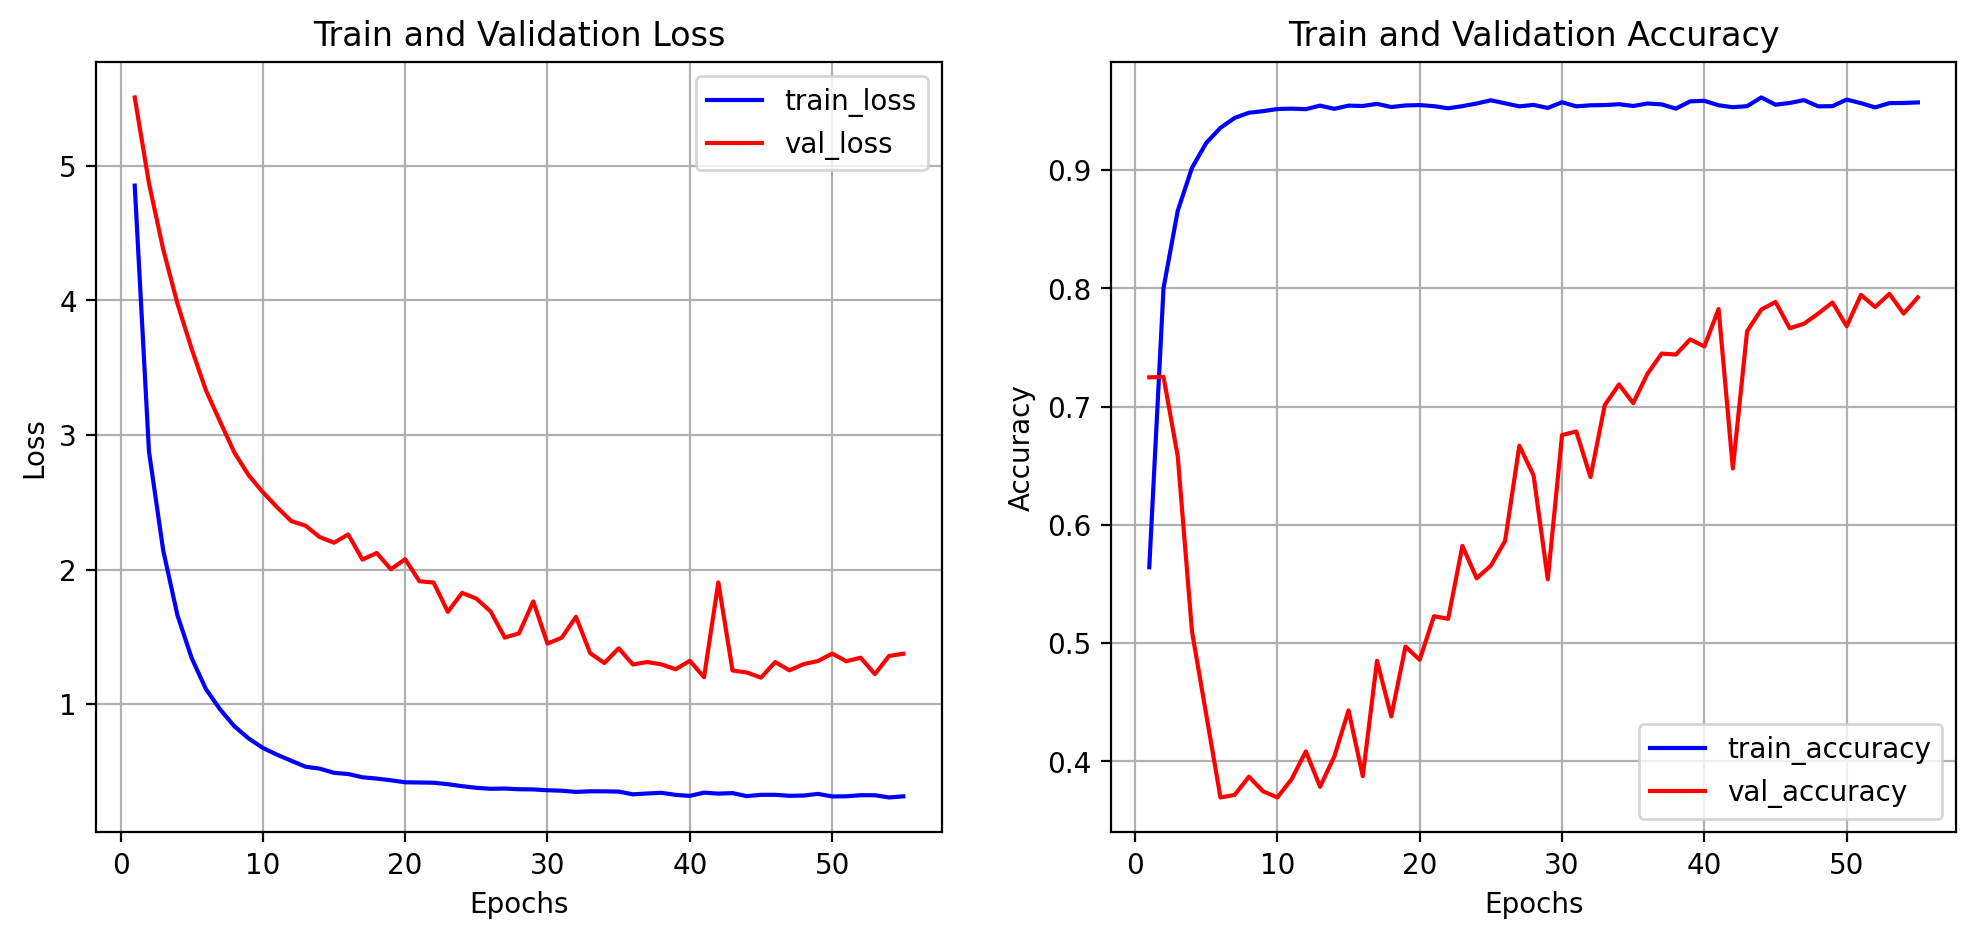

In [66]:
show_history_c(history)

## 2-6 Evaluation

In [67]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 2s 22ms/step - loss: 1.3258 - accuracy: 0.7680


[1.3257924318313599, 0.7680320739746094]

# 3- CIFAR10

## 3-1 Import libraries

In [21]:
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

## 3-2 Load dataset & split

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (35000, 32, 32, 3) 레이블: (35000, 1)
검증 데이터: (15000, 32, 32, 3) 레이블: (15000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
print(y_train)
print(type(y_train))

[[2]
 [1]
 [9]
 ...
 [8]
 [7]
 [9]]
<class 'numpy.ndarray'>


In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

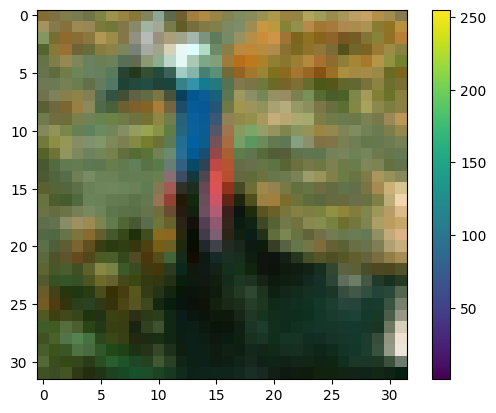

In [5]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

## 3-3 Reshape & normalization

In [6]:
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(35000, 3072) (35000, 1)
(15000, 3072) (15000, 1)
(10000, 3072) (10000, 1)


In [7]:
# y_train = y_train.ravel()
# y_val = y_val.ravel()
# y_test = y_test.ravel()

In [9]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [10]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(35000, 3072) (35000, 1)
(15000, 3072) (15000, 1)
(10000, 3072) (10000, 1)


In [11]:
# from keras.utils import to_categorical

# # Convert the labels to one-hot encoding
# y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)
# y_test = to_categorical(y_test)

## 3-4 DNN model design

In [29]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               1573376   
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1578506 (6.02 MB)
Trainable params: 1578506 (6.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model = models.Sequential()
model.add(layers.Input(shape=(3072)))

model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

model.add(layers.Dropout(0.2))

model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                     

## 3-5 Complile and training

In [30]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(35000, 3072) (35000, 1) (15000, 3072) (15000, 1) (10000, 3072) (10000, 1)


In [32]:
check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60


ValueError: in user code:

    File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [156]:
def show_history_c(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

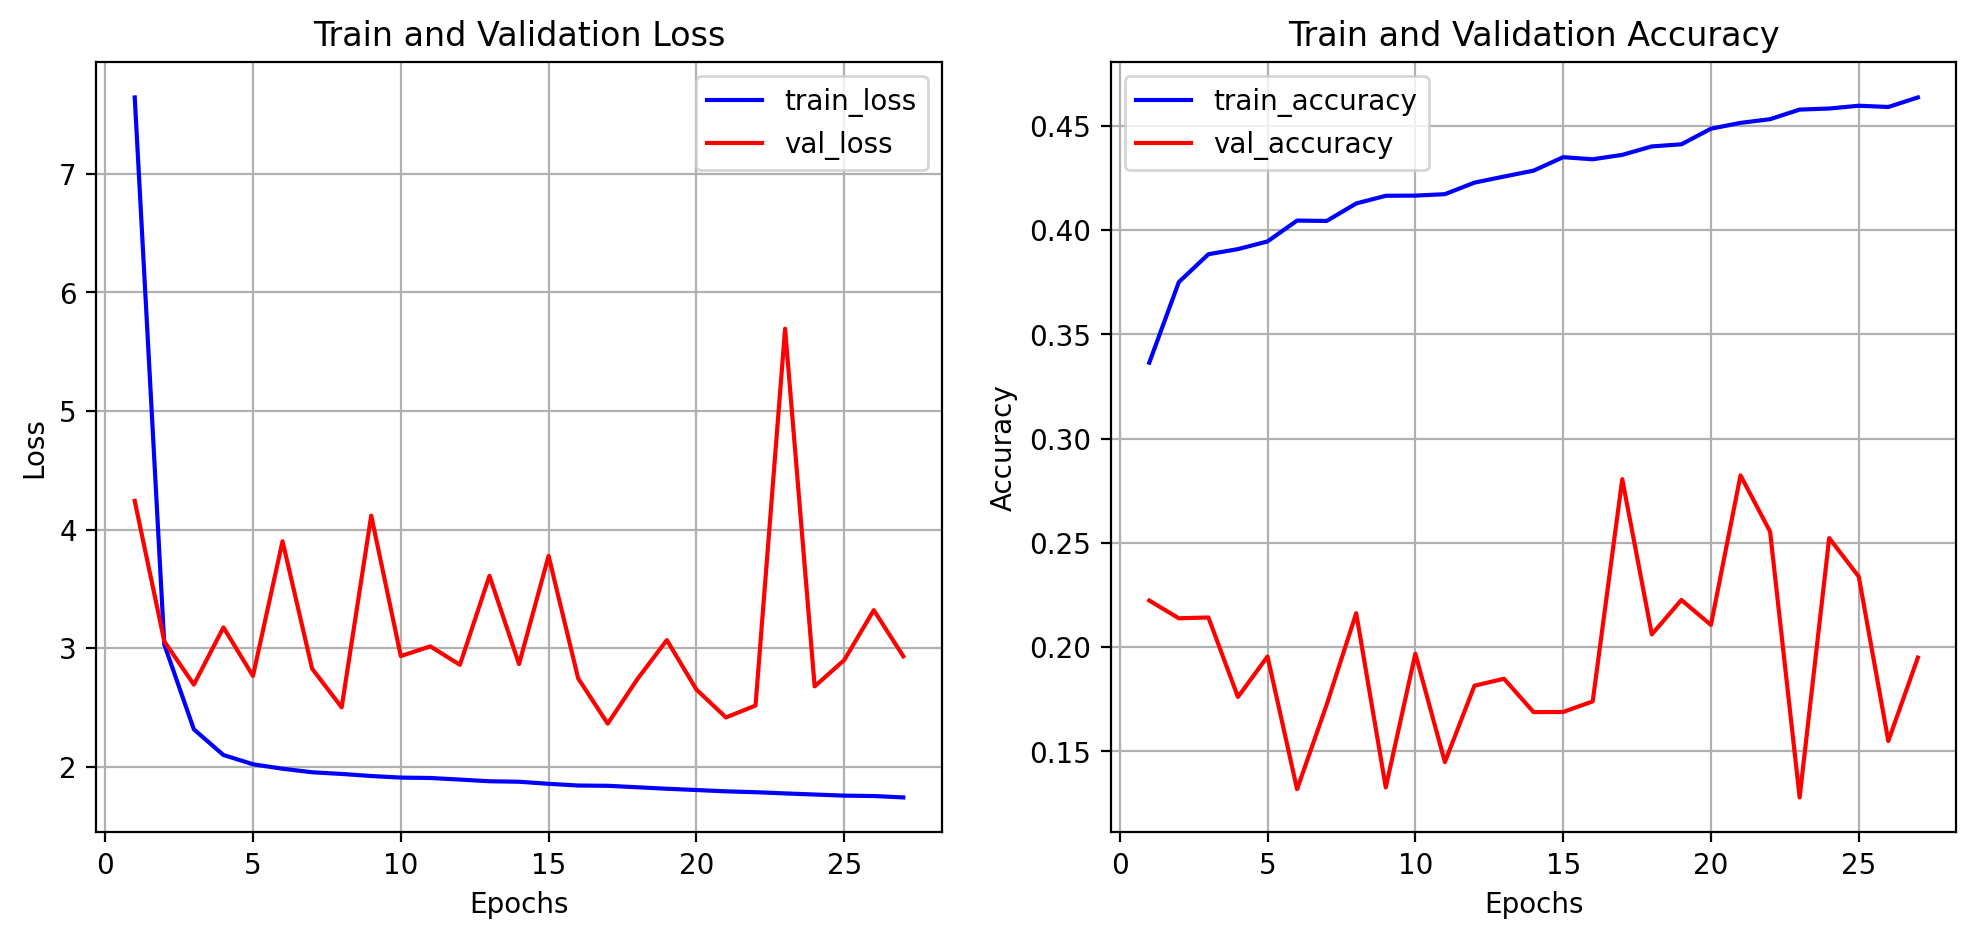

In [157]:
show_history_c(history)